<h4>Tercera entrega - Joaquin Suarez</h4>

<h5>Problema 1 MST</h5>

(MST). Dado un grafo G = (V, E) con n vertices y m aristas. (El grafo podría representar una red telefónica). Cada arista es coloreada azul o roja. Tambien esta dado un parámetro k como parte de la entrada. Proponga un algoritmo que encuentre un árbol de expansión sobre G con exactamente k aristas azules, y exactamente n-k-1 aristas rojas. Determine el tiempo de ejecución del algoritmo y muestre que es correcto.

Para empezar se ordenan las aristas del grafo en una lista, con esta lista procedemos a crear el arbol de minima expansion 

In [3]:
import networkx
import itertools
import logging
import time
import math
import numpy as np
import pylab as pl

In [6]:
def abrirArchivo(nom):
    lines = [line.rstrip("\n") for line in open(nom)]
    N = int(lines[0])
    K = int(lines[1])
    L = []
    i = 0
    for l in lines[2:]:
        t = l.split(',',N - i)
        i -= 1
        q = (i * -1) - 1
        for j in t:
            if(j != 'Inf'):
                tokens = j.split('/',1)
                u = ((i * -1) - 1)
                L.append((u,q, int(tokens[0]) , tokens[1]))
            q+=1
    return N, K, L

Luego definimos las clases necesarias

In [3]:
class arista:
    def __init__(self,origen,destino,color,peso):
        self.origen=origen
        self.destino=destino
        self.color=color
        self.peso=peso
        
def ordena(l):
    for c in range(1,len(l)):
        for x in range(len(l)-1):
            if l[x].peso>l[x+1].peso:
                aux=l[x]
                l[x]=l[x+1]
                l[x+1]=aux

        
def OrderEdge(g):
    lis=[]
    repetido=[]
    for u in graph:
        origen=u
        for v in graph[u]:
            destino=v
            for x in g[u][v]:
                if(x=='R' or x=='B'):
                    color=x
                else:
                    peso=x
            if(not destino in repetido):        
                a=arista(origen,destino,color,peso)
                lis.append(a)
        repetido.append(origen)
    ordena(lis)
    return lis

Se halla el MST

In [4]:
def MST(lista,k,n):
    azules=k
    rojas=n-k-1
    cazul=0
    croja=0
    res=[]
    valor=0
    print("K:",k)
    print("n-k-1:",rojas)
    for i in lista:
        introducir=False
        if(i.color=='R'):
            if(croja<rojas):
                introducir=True
                croja=croja+1
        elif(i.color=='B'):
            if(cazul<azules):
                introducir=True
                cazul=cazul+1
        if(introducir):
            arbol={i.origen:{i.destino: i.color}}
            res.append(arbol)
            valor=valor+i.peso
    print("Peso: ",valor)
    print("Aristas Azules: ",cazul)
    print("Aristas Rojas: ",crojo)
    return res;

In [7]:
g,nod,color=abrirArchivo("input_n8_b5_r2")
aristas=OrderEdge(g)
print (MST(aristas,color,nod))

ValueError: invalid literal for int() with base 10: 'Inf Inf 5'

<h4>Hamming</h4>

(Cliques en Grafos). La distancia de Hamming dist(u,v) entre dos vectores binarios v = (v_1 , . . . , v_n ) and w = (w_1 , . . . , w_n ) es el número de índices k tal que v_k \neq w_k. Una pregunta fundamental en la teoría de la codificación es determinar el número A(n, d) = max |{S ⊂ {0, 1} n | dist(u, v) ≥ d for all distinct u, v ∈ S}|, el máximo número de vectores binarios de longitud n que uno puede encontrar tal que dos vectores diferentes tienen una distancia de Hamming ≥ d.  Por ejemplo, A(5, 4) = 2. 

El grafo de Hamming H(n, d) = (V, E) es el gráfo con 2^n vertices V dados por cadenas binarias de longitud n. Nosotros tenemos (u, v) ∈ E si y solo si dist(u, v) ≥ d. El número A(n,d) coincide con el tamaño de un clique máximo en H(n,d). Encuentre un algoritmo "eficiente"  para calcular el clique máximo en el grafo de Hamming (calcular el clique máximo es un problema NP-difícil).

Este algoritmo es tomado de https://gist.github.com/mariaperez/1896793 y se adaptó para que correspondiera al problema del proyecto. En principio se genera un grafo de hamming 

In [1]:
def hamdist(str1, str2):        
        diffs = 0
        for ch1, ch2 in zip(str1, str2):
                if ch1 != ch2:
                        diffs += 1
        return diffs

def hamming_binary(chromosome_len, d):
    """Generate a binary Hamming Graph, where each genotype is composed by chromosome_len bases and each base can take only two values. H(chromosome_len, 2). 
    
    steps to generate an Hamming graph:
    
     * create 2^chromosome_len nodes, each for a different binary string
     * for each node, find the connected nodes by flipping one position at a time.
    """
    space = networkx.Graph()

    # create all nodes
    l = ["01"] * chromosome_len 
    all_nodes = itertools.product(*l)
    all_nodes = [''.join(x) for x in all_nodes]
    #logging.debug(all_nodes)
    space.add_nodes_from(all_nodes) 
    
    # for each node, find neighbors
    
    for node in space.nodes():
        #[space.add_edge(node, mutate_node(node, base)) for base in range(chromosome_len)]
        
        for v in space.nodes():
            if(v != node):
                dist = hamdist(node, v)
                if(dist >= d):
                    space.add_edge(node,v)
    
    return space


def mutate_node(node, n):
    # wonder if there is some binary utils package for python
    if node[n] == '0':
        newbase = '1'
    else:
        newbase = '0'
    new_node = node[0:n] + newbase + node[n+1:]
    return new_node


In [5]:
space = hamming_binary(3,1)
print space

Seguidamente se usa un algoritmo tomado de https://networkx.github.io/documentation/development/_modules/networkx/algorithms/clique.html#find_cliques con el cual se cuentran los cliques de un grafo 

C:\ProgramData\Anaconda2\lib\site-packages\networkx\drawing\nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
C:\ProgramData\Anaconda2\lib\site-packages\networkx\drawing\nx_pylab.py:138: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(b)
C:\ProgramData\Anaconda2\lib\site-packages\matplotlib\__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
C:\ProgramData\Anaconda2\lib\site-packages\matplotlib\rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  warnings.warn("axes.hold is deprecated, will be removed in

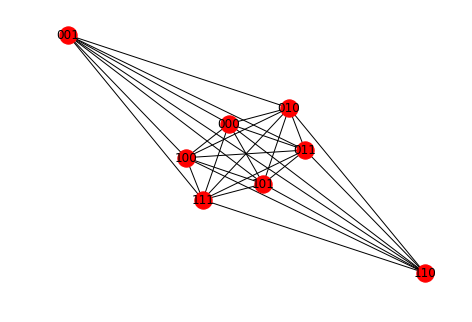

[['010', '011', '001', '100', '000', '101', '111', '110']]
8


In [6]:
import matplotlib.pyplot as plt
networkx.draw(space,with_labels = True)  # networkx draw()
plt.draw()  # pyplot draw()
plt.show()
#source https://networkx.github.io/documentation/development/_modules/networkx/algorithms/clique.html#find_cliques

print list(networkx.find_cliques(space)) 
print networkx.graph_clique_number(space)

Finalmente realizamos el analisis del tiempo de ejecución de los algoritmos con el metodo exper analys.

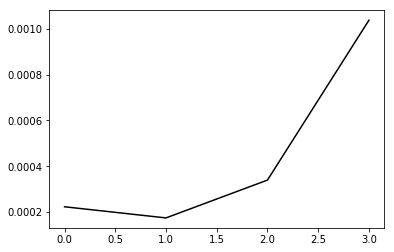

In [8]:
import time
import math
import numpy as np
import pylab as pl
def exper_analys_clique(N):
    R = []
    for i in range(N):
        tic = time.clock()#get start time
        space = hamming_binary(i,2) # Para probar ponemos d = 2 ne el graph
        networkx.graph_clique_number(space)
        toc = time.clock()#get final time
        R.append(toc - tic)
    return R

N = 4
pl.clf()
x = np.arange(N)
y = np.array(exper_analys_clique(N))
pl.plot(x, y, '-k')
pl.show()